In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

data = np.random.randn(1000)

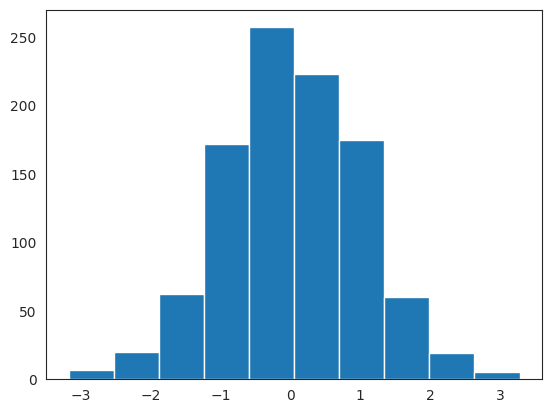

In [4]:
plt.hist(data);

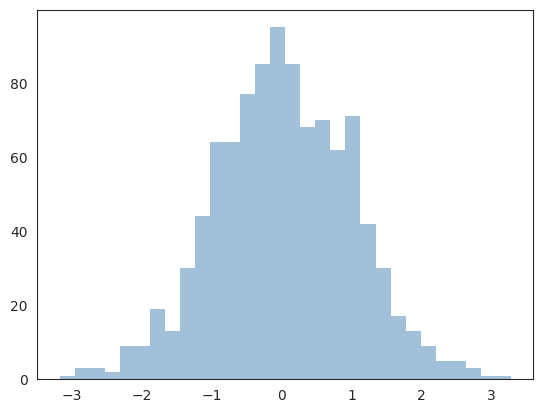

In [5]:
plt.hist(data, bins=30, alpha=0.5,
        histtype='stepfilled', color='steelblue',
        edgecolor='none');

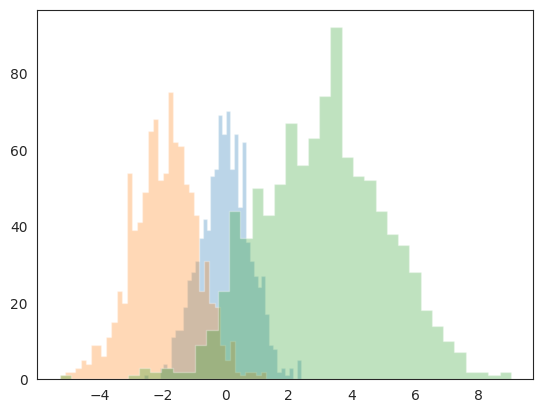

In [6]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [7]:
#Two Dimensional Histograms and bins (plt.hist2d)
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean,cov, 10000).T

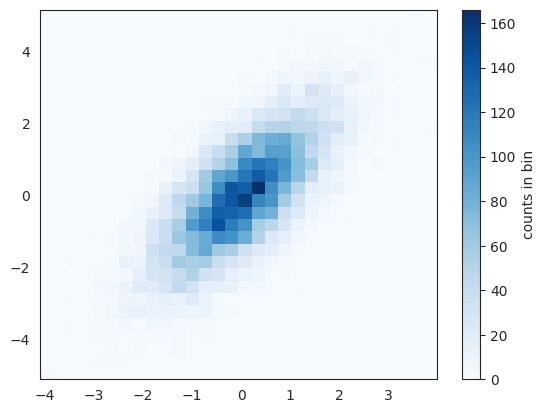

In [8]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

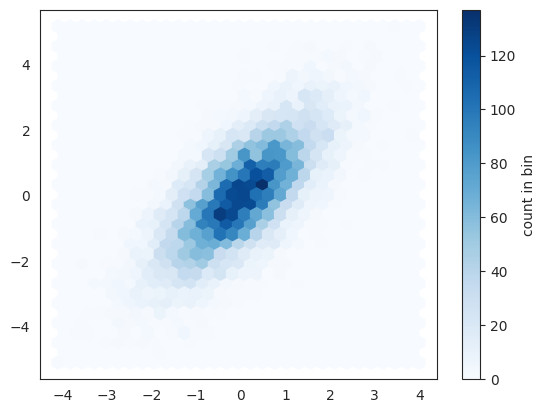

In [9]:
#Hexagoanl binnings
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label = 'count in bin')

In [10]:
#Kernel density estimation
from scipy.stats import gaussian_kde

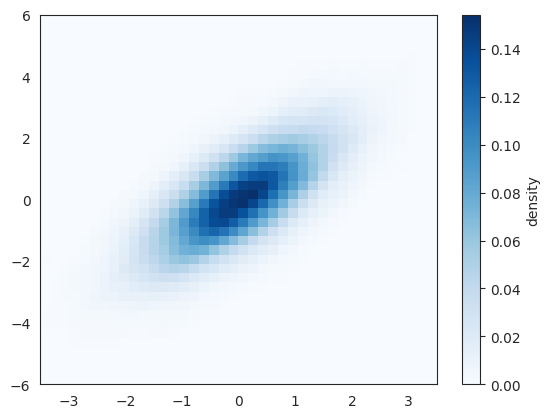

In [11]:
#fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

#evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

#Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
          origin='lower', aspect='auto',
          extent=[-3.5, 3.5, -6, 6],
          cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

In [12]:
#Customizing Plot legends
plt.style.use('classic')

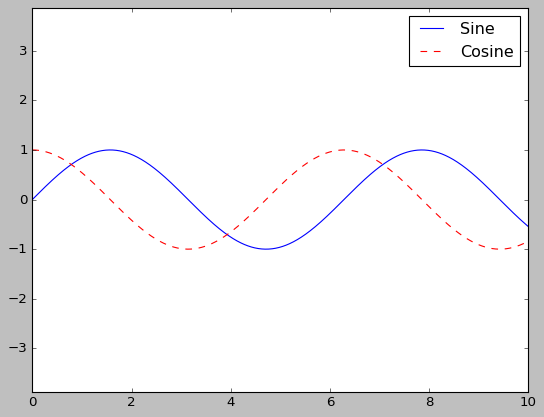

In [13]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

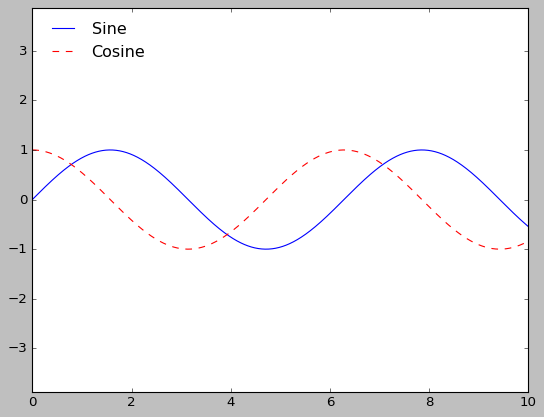

In [14]:
ax.legend(loc='upper left', frameon=False)
fig

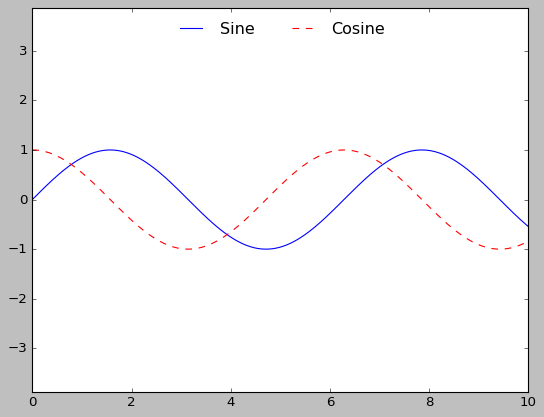

In [15]:
ax.legend(loc='upper center', frameon=False, ncol=2)
fig

In [16]:
#Legend for size of points.
import pandas as pd
cities = pd.read_csv('california_cities.csv')

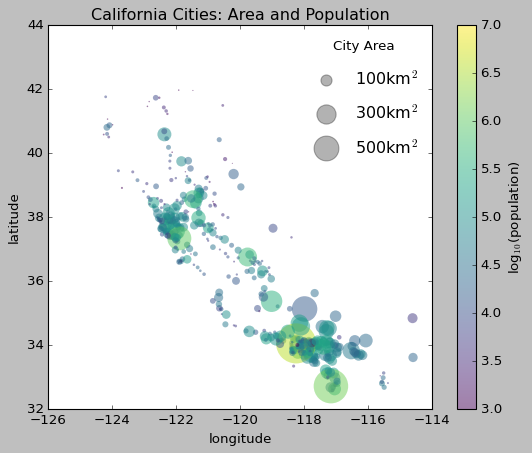

In [17]:
#Extract the data we are interested in.
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

#scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
           c=np.log10(population), cmap='viridis',
            s=area,linewidth=0, alpha=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

#Here  we create a legend
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
               label=str(area) + 'km$^2$')
    plt.legend(scatterpoints=1, frameon=False,
              labelspacing=1, title='City Area')
    plt.title('California Cities: Area and Population');

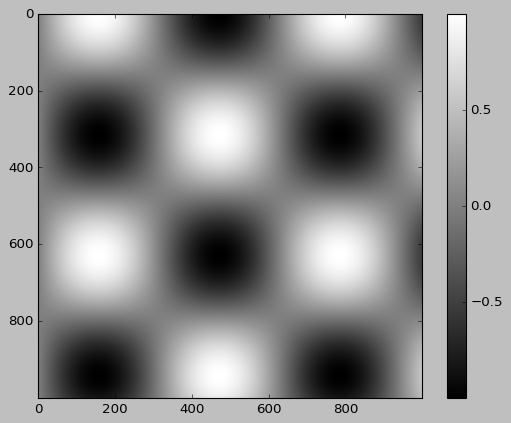

In [18]:
#Customizing Colour Bars.
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I, cmap='gray')
plt.colorbar();

In [19]:
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a gray scale version of the given colormap"""
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    #Convert RGBA to percieved grayscale luminance
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]

    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)


def view_colormap(cmap):
    """Plot a Colormap with its grayscale equivalent"""
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))

    fig, ax = plt.subplots(2, figsize=(6, 2),
                          subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

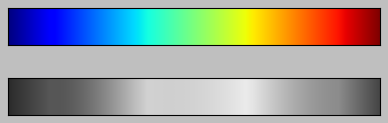

In [20]:
view_colormap('jet')

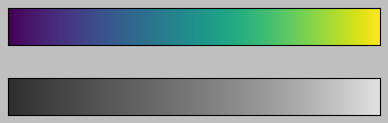

In [21]:
view_colormap('viridis')

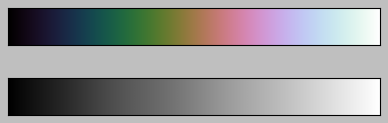

In [22]:
view_colormap('cubehelix')

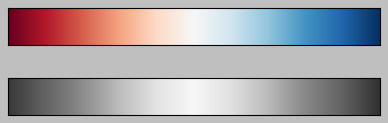

In [23]:
view_colormap('RdBu')

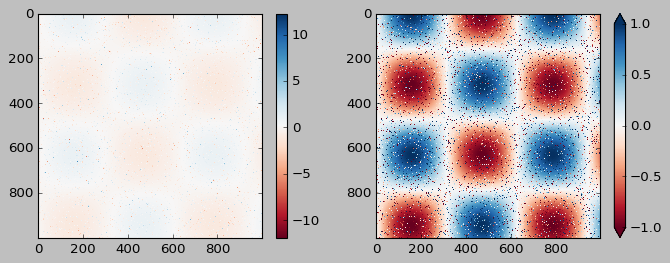

In [28]:
#Color limits and extension
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

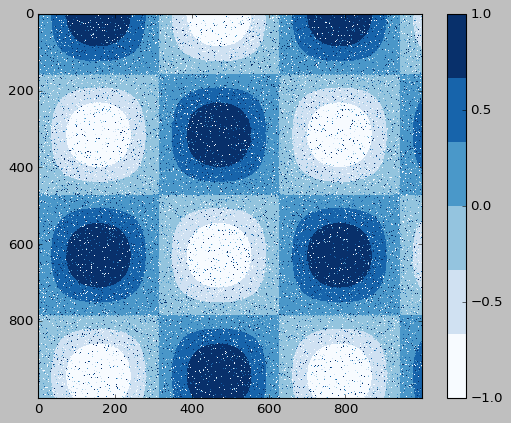

In [29]:
#Descrete colorbars.
plt.imshow(I, cmap=plt.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

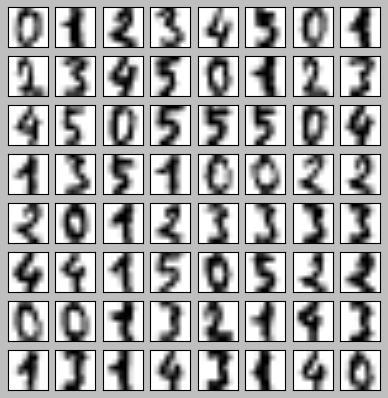

In [36]:
#Application in Handwritten Digits (Discrete colorbars)
#load image of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax  = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

/home/moyi/miniconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/moyi/miniconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


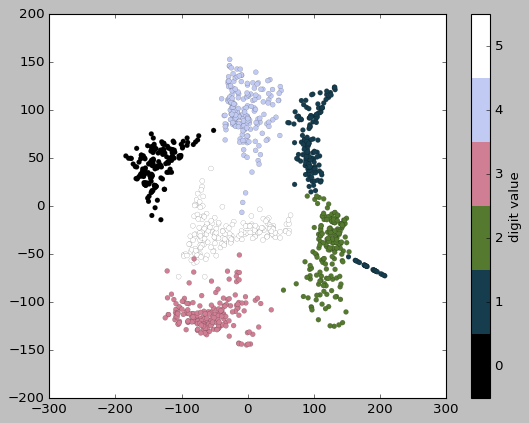

In [37]:
#project the digits into 2 dimensions using Isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

#plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
           c=digits.target, cmap=plt.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)